# Demonstration of Statistical Entropy Concepts using a System of Quantum Harmonic Oscillators
This notebook contains a simple python description of a system of quantum harmonic oscillators and uses this to explore concepts of entropy for statistical thermodynamics.

In [1]:
# first we import some important python libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = 4, 4


In the following model each harmonic oscillator has equally spaced energy levels:

$E_k = (k + \frac{1}{2})\hbar w$

In the system, there are $N$ independent harmonic oscillators and each harmonic oscillator can emit a photon which is  immediately absorbed by another oscillator. This is an isolated system with constant total energy $E$.

Given this description we can write a crude Monte Carlo function to simulate microstates that correspond to the macrostate of $N$ harmonic oscillators with $E$ total energy.

In [2]:
def harmonic_oscillators(N, E, t):
    #initiallize oscilators (this is probably not the most efficient initial configuration)
    oscillators = np.zeros(N)
    oscillators[0] = E

    #loop over t steps to equilibrate the system
    for step in range(t):

        #take a trial move
        oscillators_trial = copy.deepcopy(oscillators)

        #randomly exchange energy
        A =  np.random.randint(0, high=N)
        B =  np.random.randint(0, high=N)
        oscillators_trial[A] = oscillators_trial[A]+1
        oscillators_trial[B] = oscillators_trial[B]-1

        #test if move is unphysical and reject
        if any(i < 0 for i in oscillators_trial):
            continue

        #accept move
        oscillators =  copy.deepcopy(oscillators_trial)
    
    return(oscillators)


 The above code returns an array with the energy state for each oscillator. For simplicity we set an individual oscillators ground state as 0 and $\hbar$ and $w$ equal to 1.

We can graphically disaply the system as a bar graph:

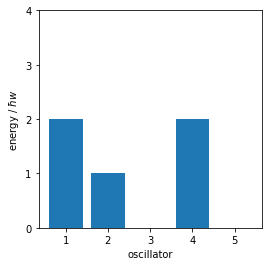

In [3]:
#run a simulation for a small system
num_oscillators = 5
total_energy = 5
eq_oscillators =  harmonic_oscillators(num_oscillators,total_energy,1000)

#plot the  results

plt.bar(np.arange(num_oscillators)+1, eq_oscillators)
plt.xticks(np.arange(num_oscillators)+1)
plt.yticks(np.arange(total_energy))
plt.xlabel("oscillator")
plt.ylabel("energy / $\hbar w$")
plt.show()
#plt.savefig("./oscillatorexample.png", dpi=600)
plt.close()



Using this simulation model lets calculate the probability, $P(k)$, of finding an oscillator with energy $k$.
(We also need to generate a system with more oscillators and energy for better equilibrium)

In [4]:
num_oscillators = 300
total_energy = 500
eq_oscillators =  harmonic_oscillators(num_oscillators,total_energy,1000000)

#calculate probability
prob_state = []
for ek in range(total_energy):
    count = (eq_oscillators == ek).sum()
    prob_state.append(count/num_oscillators)


We can then plot the probability for each energy state

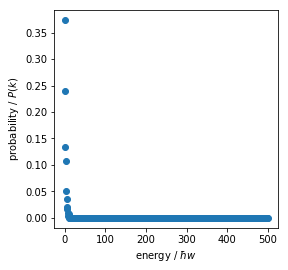

In [5]:
plt.plot(np.arange(total_energy), prob_state, 'o')
plt.ylabel("probability / $P (k)$")
plt.xlabel("energy / $\hbar w$")
plt.show()
#plt.savefig("energy_probabilities.png", dpi=600)
plt.close()


In [6]:
But this isnt the best way to plot this. We should find a linear relationship between $\mathrm{ln}(P(k))$ and k

SyntaxError: invalid syntax (<ipython-input-6-8810ff3d9bbb>, line 1)

/Users/jevans/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


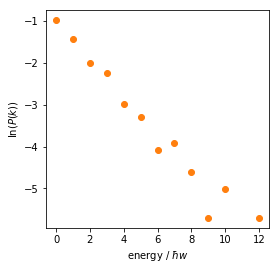

In [7]:
plt.plot(np.arange(total_energy), np.log(prob_state), 'o', color="C1")
plt.ylabel("$ \ln(P (k))$")
plt.xlabel("energy / $\hbar w$")
plt.show()
#plt.savefig("energy_probabilities_log.png", dpi=600)
plt.close()


We wont cover this here, in detail, but the relationship between $P(k)$ is dictated by the the Boltzmann probability distribution:

 $P(k) = \frac{\exp(-\beta E_k)}{q}$

Finally we will consider the time dependence of entropy in this isolated system. Let us condisder a system where at an initial time all the energy is at a single oscillator.

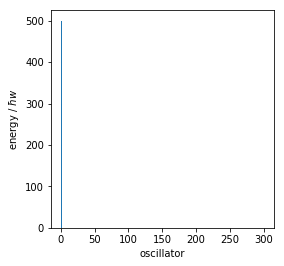

In [8]:
num_oscillators = 300
total_energy = 500

init_oscillators = np.zeros(num_oscillators)
init_oscillators[0] = total_energy

#plot inital configuration
plt.bar(np.arange(num_oscillators)+1, init_oscillators,color="C0")
plt.xlabel("oscillator")
plt.ylabel("energy / $\hbar w$")
plt.show()
#plt.savefig("./inital_oscillatorexample.png")
plt.close()


Entropy for a system not at equilibrium can be described by Gibbs entropy equation:
$S = -N k_{B} \sum_{k}P(k)\ln[ P(k)]$
At equilibrium, this is equivalent to Boltzmann's equation for entropy.

Lets define a function to calculate entropy given this equation. (setting $k_{B}$ to 1)

In [9]:
#this function takes the total number of oscillators and the probability for each energy state 
def gibbs_entropy(N, prob_states):
    return(-1*num_oscillators*np.nansum(prob_state*np.log(prob_state)))


So at each time step we allow a transfer of one energy unit between two oscillators (at random). Fortunately this is exactly how the initial Monte Carlo model works so all we need to do is loop over a series of trial steps (which now represent timesteps).

/Users/jevans/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/jevans/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


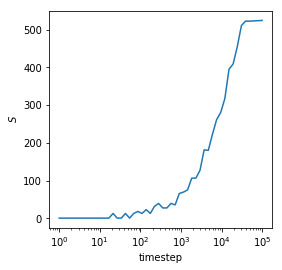

<function matplotlib.pyplot.close(fig=None)>

In [10]:
S = []
for steps in np.logspace(0,6):
    eq_oscillators =  harmonic_oscillators(num_oscillators,total_energy,int(steps))
    prob_state = []
    for ek in range(total_energy):
        count = (eq_oscillators == ek).sum()
        prob_state.append(count/num_oscillators)
    S.append(gibbs_entropy(num_oscillators,prob_state))
#
# plot the results
plt.semilogx(np.logspace(0,5), S)
plt.xlabel("timestep")
plt.ylabel("$S$")
plt.show()
#plt.savefig("./time.png", dpi=600)
plt.close


 Entropy increases over time! The second law of thermodynamics.